# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

#! curl -O https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [152]:
from collections import defaultdict
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier


import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [153]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# Преобразуем датасет к датафрейму
data_df = pd.DataFrame(data)
target_df = pd.DataFrame(target)

print("Обучающая выборка:")
display(data_df.head())

print("Таргет выборка:")
display(target_df.head())

(846, 19) (846,)
Обучающая выборка:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183


Таргет выборка:


,0
0,van
1,van
2,saab
3,van
4,bus


In [154]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,422.500000,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,244.363459,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,211.250000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,422.500000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,633.750000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


In [155]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       846 non-null    int64
 1   1       846 non-null    int64
 2   2       846 non-null    int64
 3   3       846 non-null    int64
 4   4       846 non-null    int64
 5   5       846 non-null    int64
 6   6       846 non-null    int64
 7   7       846 non-null    int64
 8   8       846 non-null    int64
 9   9       846 non-null    int64
 10  10      846 non-null    int64
 11  11      846 non-null    int64
 12  12      846 non-null    int64
 13  13      846 non-null    int64
 14  14      846 non-null    int64
 15  15      846 non-null    int64
 16  16      846 non-null    int64
 17  17      846 non-null    int64
 18  18      846 non-null    int64
dtypes: int64(19)
memory usage: 125.7 KB


> Все данные имеют числовой формат и судя по-всему 0 фит это индекс, дропнем его.

In [156]:
data_df = data_df.drop(columns=0)

In [157]:
# Проверим наличие пропусков в данных
data_df.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
dtype: int64

> Пропусков нет

In [158]:
data_df[data_df.duplicated()]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18


> Дублей нет

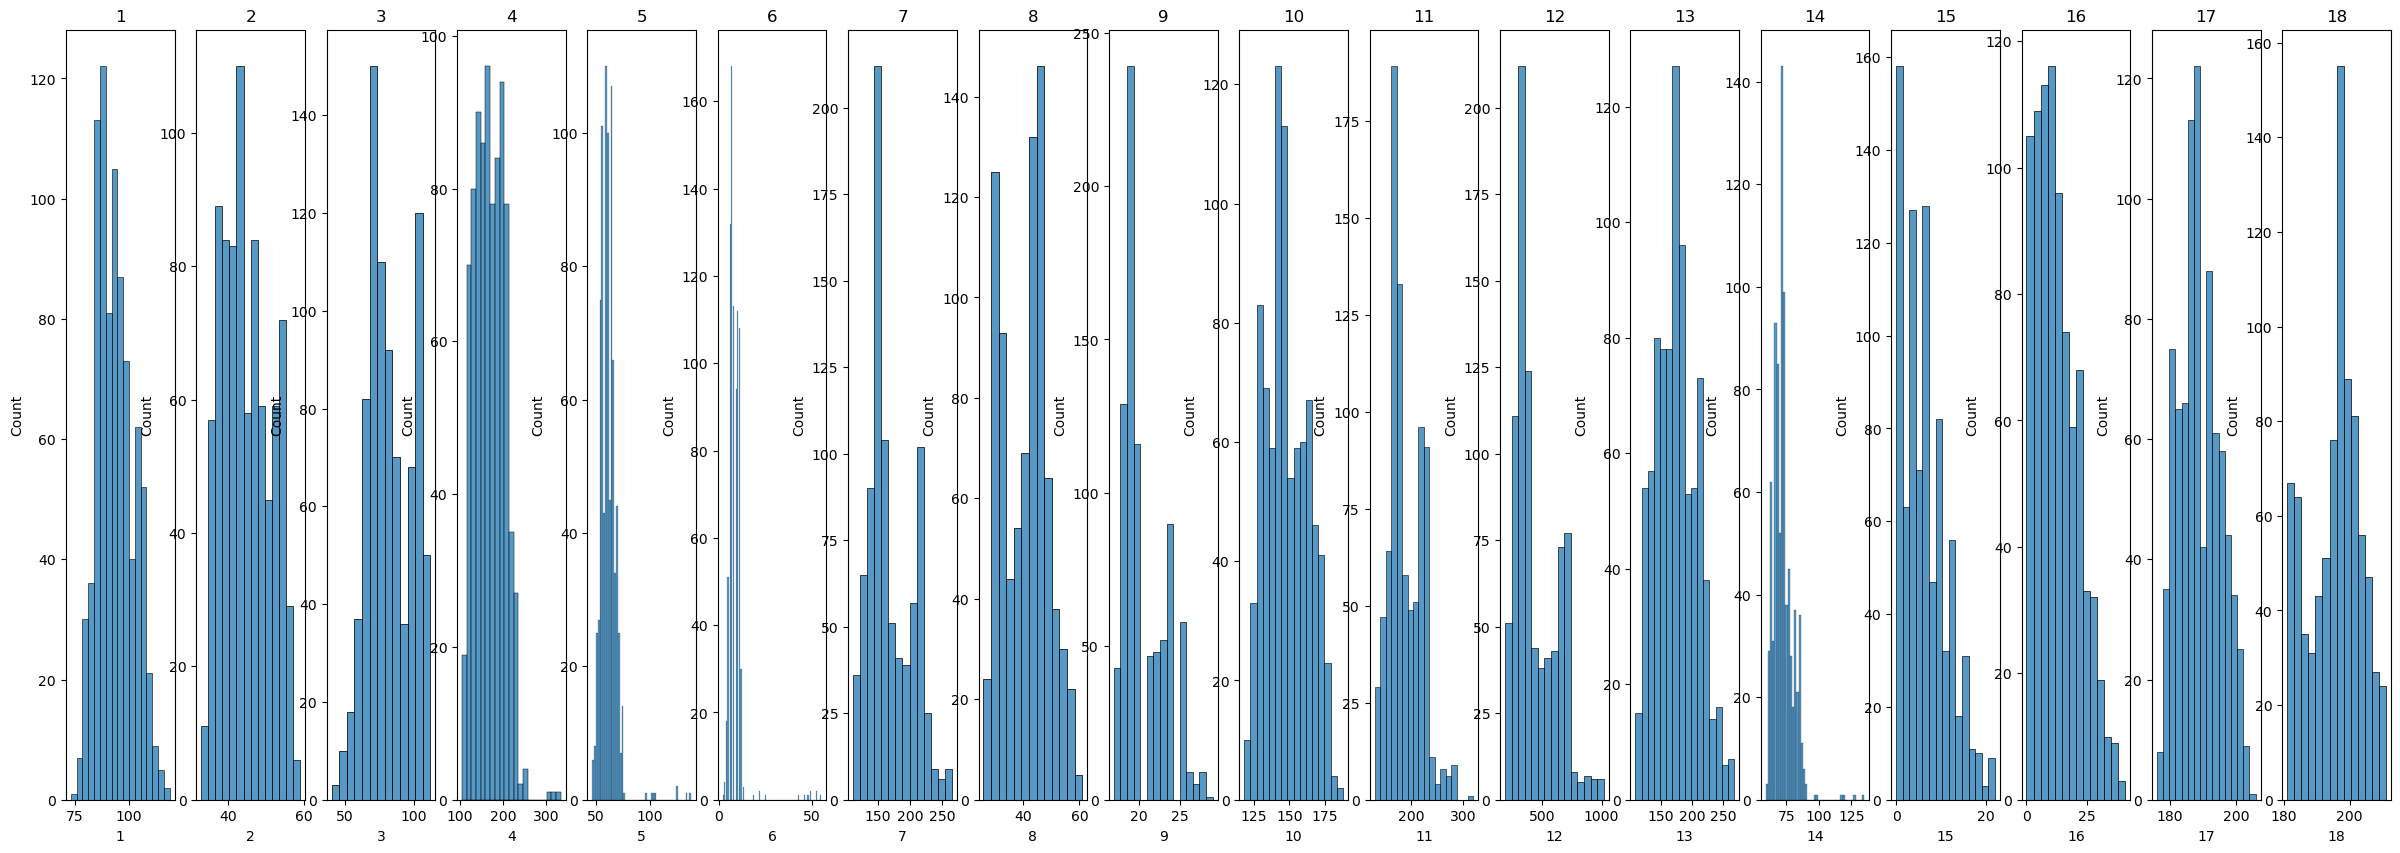

In [159]:
num_columns = len(data_df.columns)

# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(30, 10))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df.columns):
    sns.histplot(data=data_df[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
#plt.tight_layout()
plt.show()

> Признаки явно приходят из различных распределений. Часть признаков имеют явную мультимодальность и, вероятно, логнормальное распределение, следовательно лонарифмирование признаков может привести их распределение ближе к нормальному.


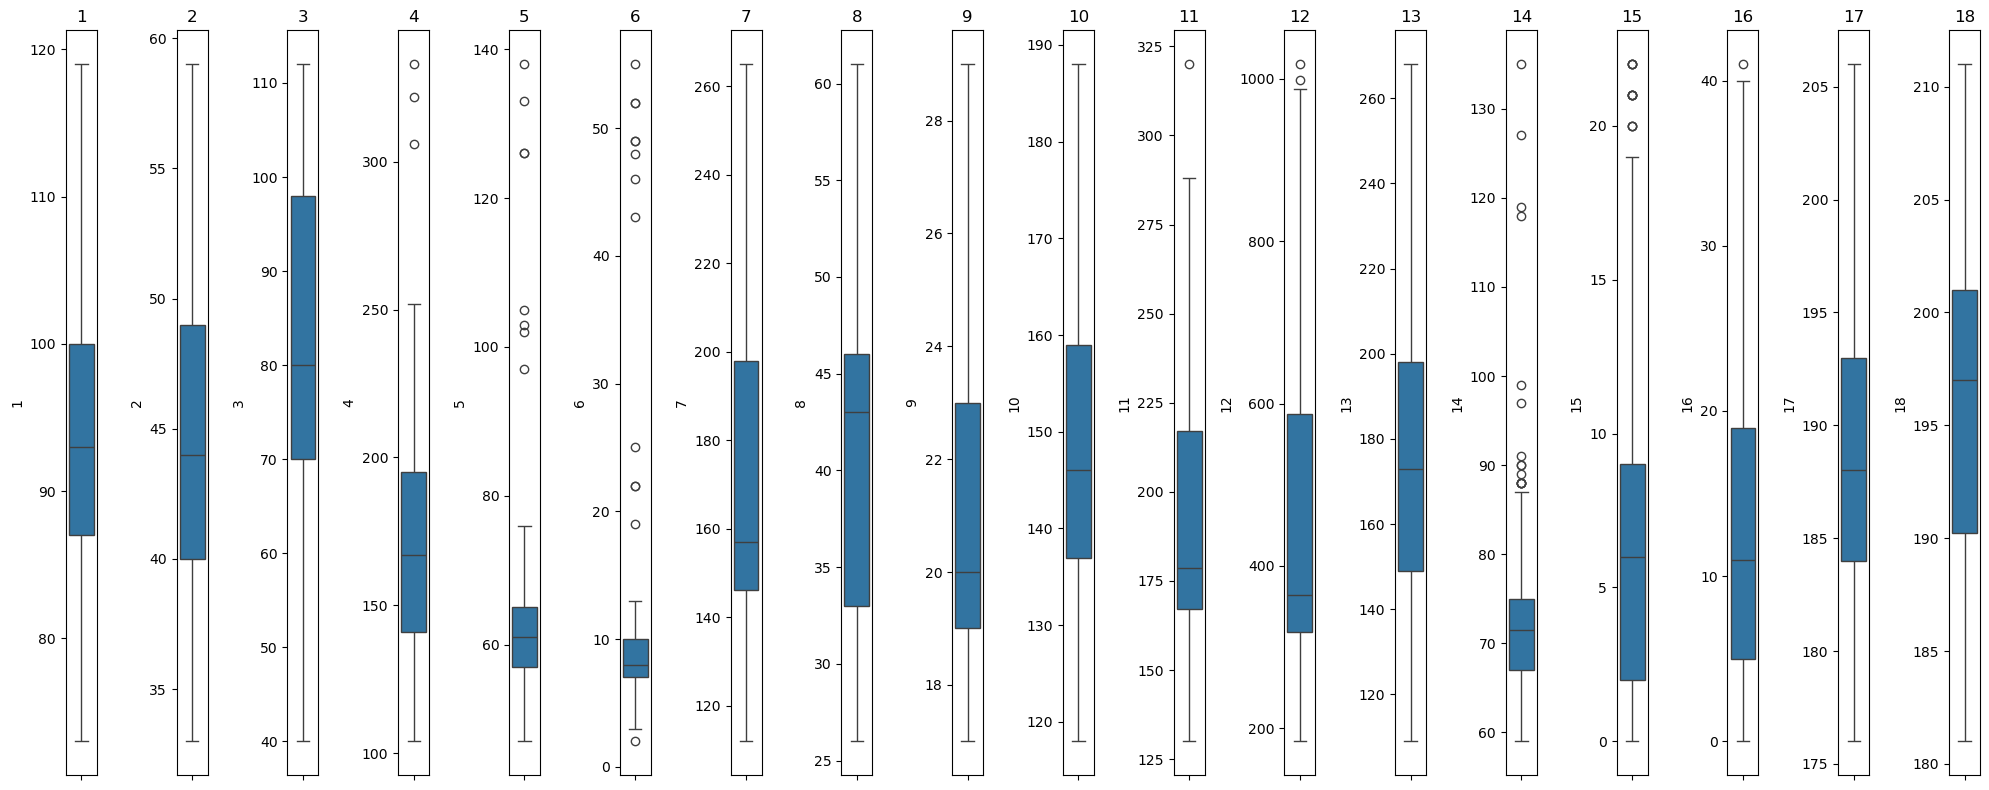

In [160]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df.columns):
    sns.boxplot(data=data_df[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

> По ряду признаков существует вероятность наличия выбросов. Нужно проверить их наличие после процедуры логарифмирования.

In [161]:
# Закодируем таргет
label_encoder =LabelEncoder()
y = label_encoder.fit_transform(target_df)
y_target = pd.DataFrame(y, columns=["target"])
y_target.value_counts()

target
0         218
2         217
1         212
3         199
Name: count, dtype: int64

> Классы сбалансированы

In [162]:
# Функция для отсечения выбросов
def outliers_z_score(data, feature, left_mod=3, right_mod=2, log_scale=False):

    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]

    mu = x.mean()

    sigma = x.std()

    lower_bound = mu - left_mod * sigma

    upper_bound = mu + right_mod * sigma

    outliers = data[(x < lower_bound) | (x > upper_bound)]

    cleaned = data[(x > lower_bound) & (x < upper_bound)]

    return  cleaned

In [163]:
# Склеим датасет для очистки выбросов
data = pd.concat([data_df, y_target], axis=1)

In [164]:
data = outliers_z_score(data, feature=3)
data = outliers_z_score(data, feature=4)
data = outliers_z_score(data, feature=5)
data = outliers_z_score(data, feature=6)
data = outliers_z_score(data, feature=14)

In [165]:
data.isna().sum()

1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
target    0
dtype: int64

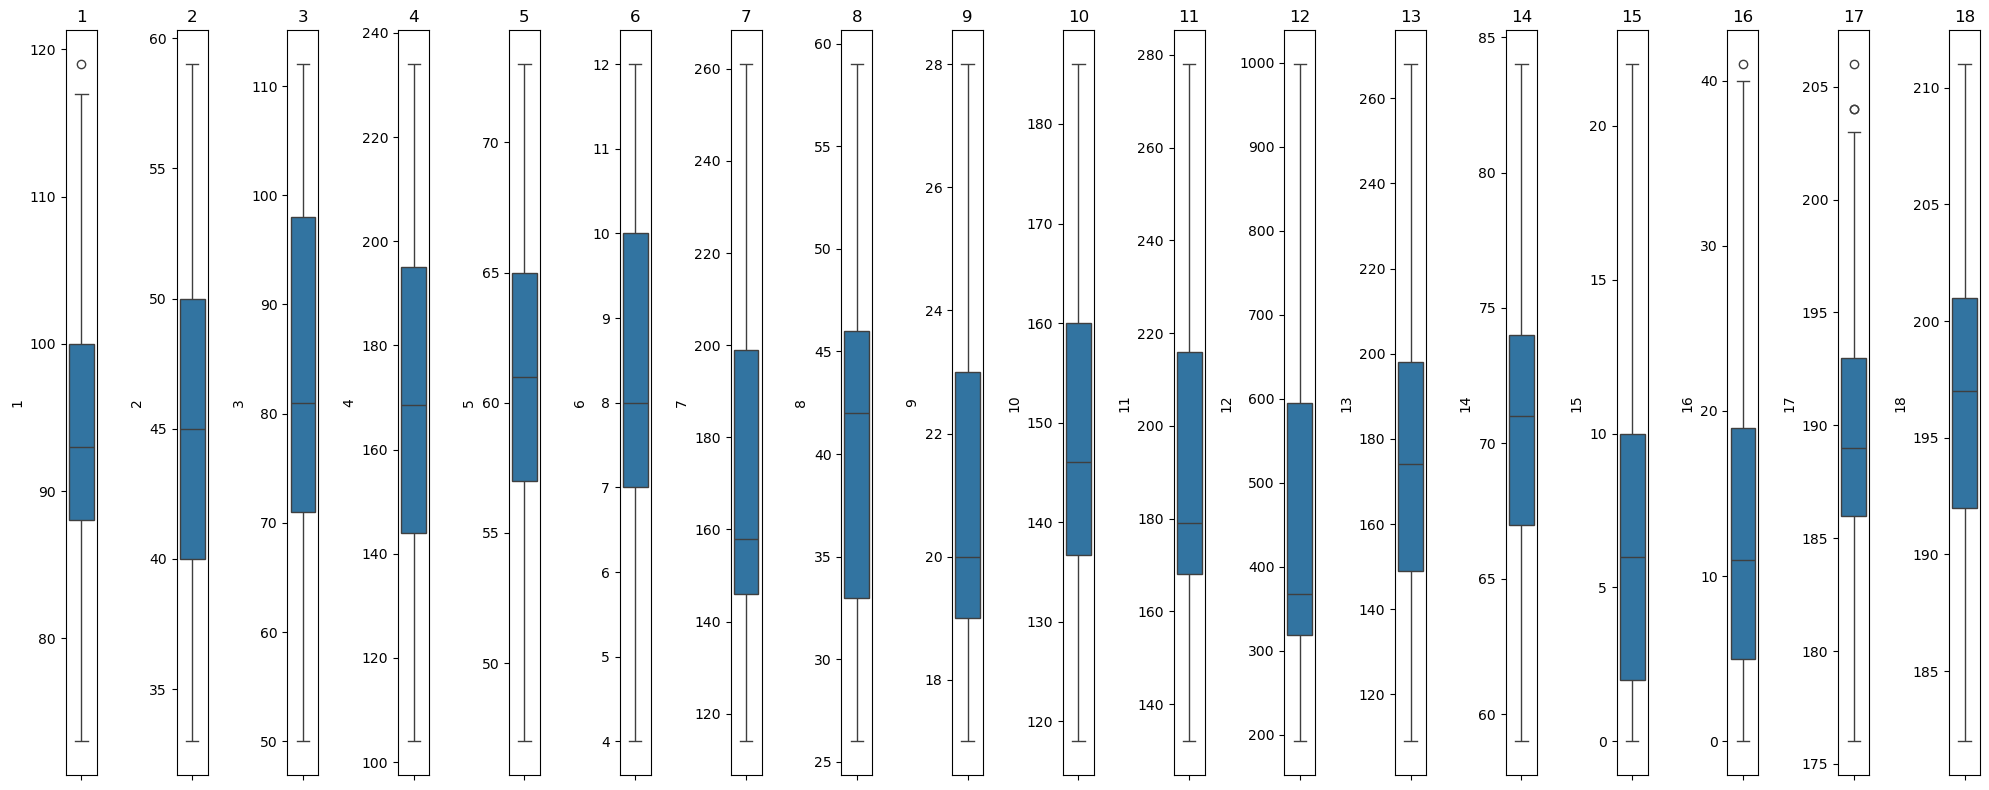

In [166]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data.columns[:-1]):
    sns.boxplot(data=data[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

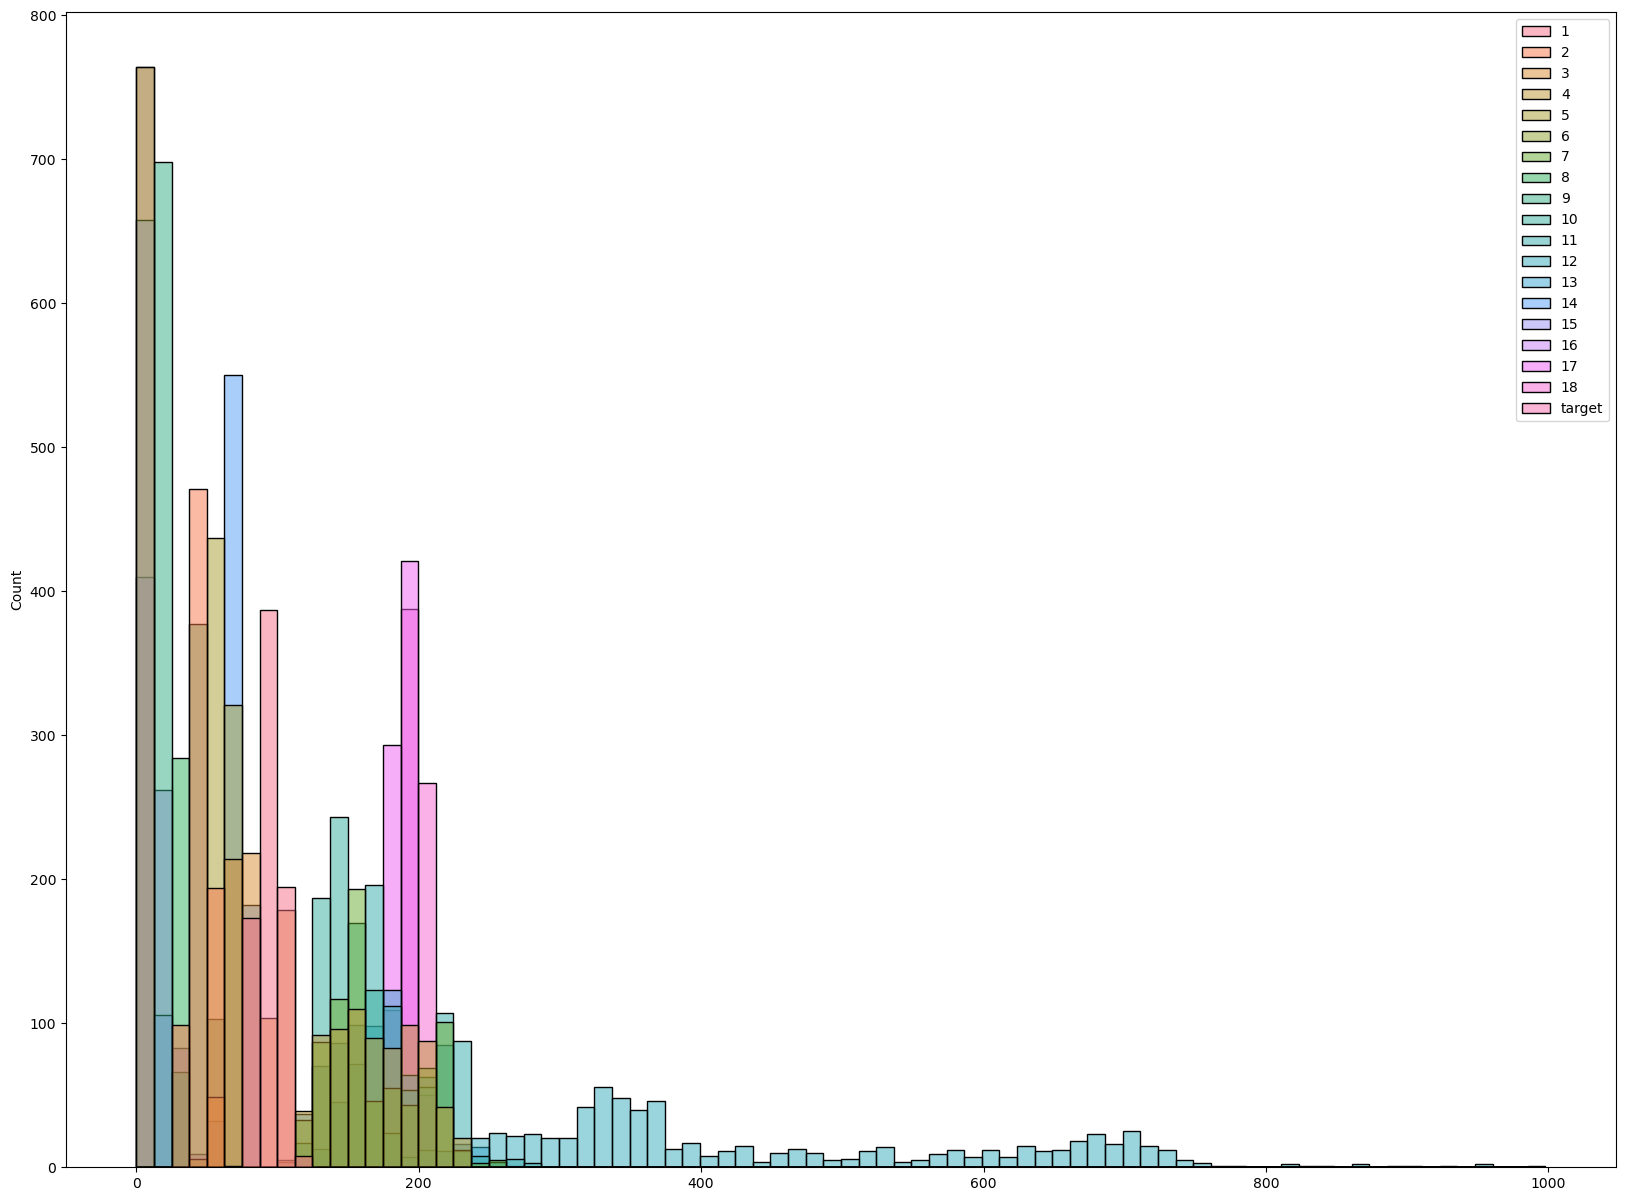

In [167]:
fig, axes = plt.subplots(1, 1, figsize=(20,15))
sns.histplot(data=data, ax=axes)
plt.show()

> Можно наблюдать различие масштабов признаков - требуется нормальнизация.

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [168]:
# Опять разведем таргет и фиты для логарифмирования
X = data.drop(columns=['target'])
y = data['target']

In [169]:
# Придется создать класс логтрасформера для включения в пайплайн (если вдруг будем включать в пайп)
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transf = X.copy()
        # прикольный метод завместо np.log(x+1)
        X_transf = np.log1p(X_transf)
        return X_transf
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        return self.transform(X)

In [170]:
log_transformer = LogTransformer()

data_df_log = X.copy()

data_df_log = log_transformer.fit_transform(X)

data_df_log.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,4.564348,3.891820,4.430817,5.187386,4.290459,2.397895,5.093750,3.761200,3.044522,5.075174,5.176150,5.940171,5.220356,4.262680,1.945910,2.833213,5.236442,5.288267
1,4.521789,3.737670,4.442651,4.955827,4.060443,2.302585,5.010635,3.828641,2.995732,4.969813,5.141664,5.802118,5.068904,4.290459,2.302585,2.708050,5.247024,5.298317
2,4.653960,3.931826,4.672829,5.347108,4.204693,2.397895,5.337538,3.496508,3.178054,5.068904,5.411646,6.455199,5.398163,4.304065,2.708050,2.302585,5.241747,5.283204
3,4.543295,3.737670,4.418841,5.075174,4.158883,2.302585,4.976734,3.850148,2.995732,4.969813,5.081404,5.736572,4.852030,4.158883,1.945910,2.397895,5.298317,5.337538
6,4.584967,3.784190,4.304065,5.159055,4.189655,1.945910,5.036953,3.761200,2.995732,4.969813,5.176150,5.891644,5.153292,4.204693,2.639057,0.693147,5.303305,5.323010


In [171]:
data_df_log = pd.concat([data_df_log, y], axis=1)
data_df_log.shape
display(data_df_log.head())

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,target
0,4.564348,3.891820,4.430817,5.187386,4.290459,2.397895,5.093750,3.761200,3.044522,5.075174,5.176150,5.940171,5.220356,4.262680,1.945910,2.833213,5.236442,5.288267,3
1,4.521789,3.737670,4.442651,4.955827,4.060443,2.302585,5.010635,3.828641,2.995732,4.969813,5.141664,5.802118,5.068904,4.290459,2.302585,2.708050,5.247024,5.298317,3
2,4.653960,3.931826,4.672829,5.347108,4.204693,2.397895,5.337538,3.496508,3.178054,5.068904,5.411646,6.455199,5.398163,4.304065,2.708050,2.302585,5.241747,5.283204,2
3,4.543295,3.737670,4.418841,5.075174,4.158883,2.302585,4.976734,3.850148,2.995732,4.969813,5.081404,5.736572,4.852030,4.158883,1.945910,2.397895,5.298317,5.337538,3
6,4.584967,3.784190,4.304065,5.159055,4.189655,1.945910,5.036953,3.761200,2.995732,4.969813,5.176150,5.891644,5.153292,4.204693,2.639057,0.693147,5.303305,5.323010,0


Выведем графики для понимания как сработало логарифмирование на признаки

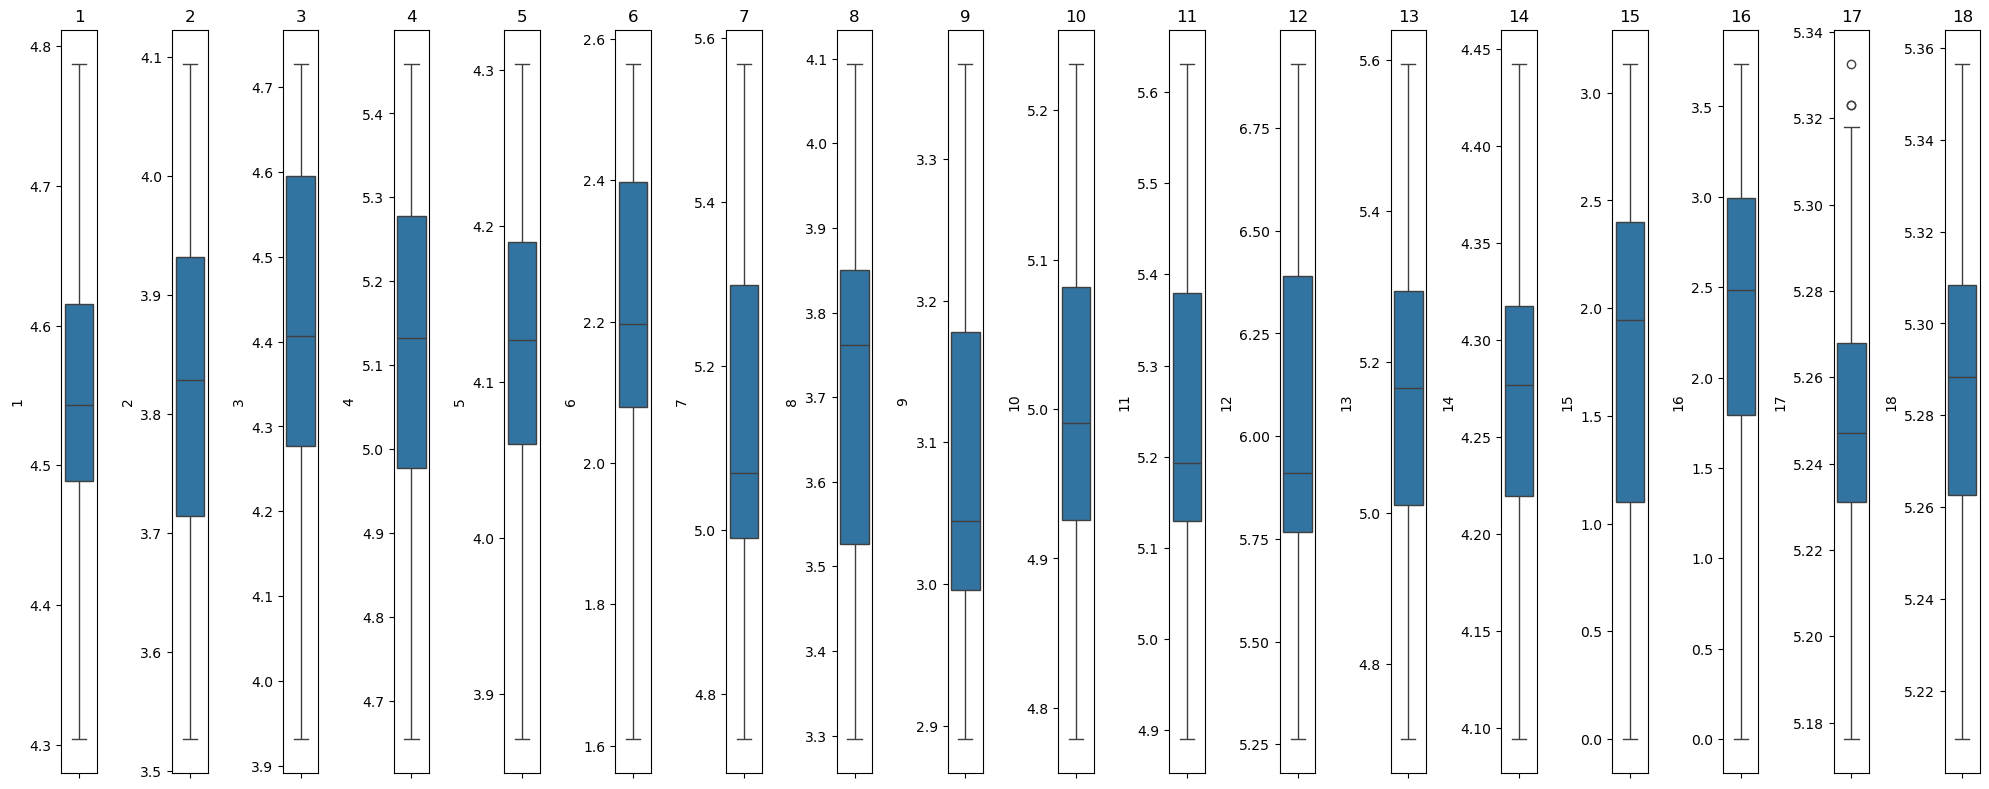

In [172]:
# Создание подграфиков
fig, axes = plt.subplots(1, num_columns, figsize=(20, 8))

# Обход всех колонок и построение боксплота для каждой из них
for i, column in enumerate(data_df_log.columns[:-1]):
    sns.boxplot(data=data_df_log[column], ax=axes[i])
    axes[i].set_title(column)

# Отображение графиков
plt.tight_layout()
plt.show()

> Можно наблюдать снижение количества признаков по которым вероятно существуют выбросы, в частности в признаках 4, 5, 6, 14. Так как у нас нет интерпретации их значений (возможно это не выбросы а характерные аномалии), и после логарифмирования мы снизили масштаб признакового пространства (что снизит влияние выбросов), то для base-line модели я решил не чистить эти фичи.

In [173]:
data_df_log.shape

(764, 19)

Проведем анализ на мультиколлинеарность признаков и влияние на таргет, для последующих этапов.

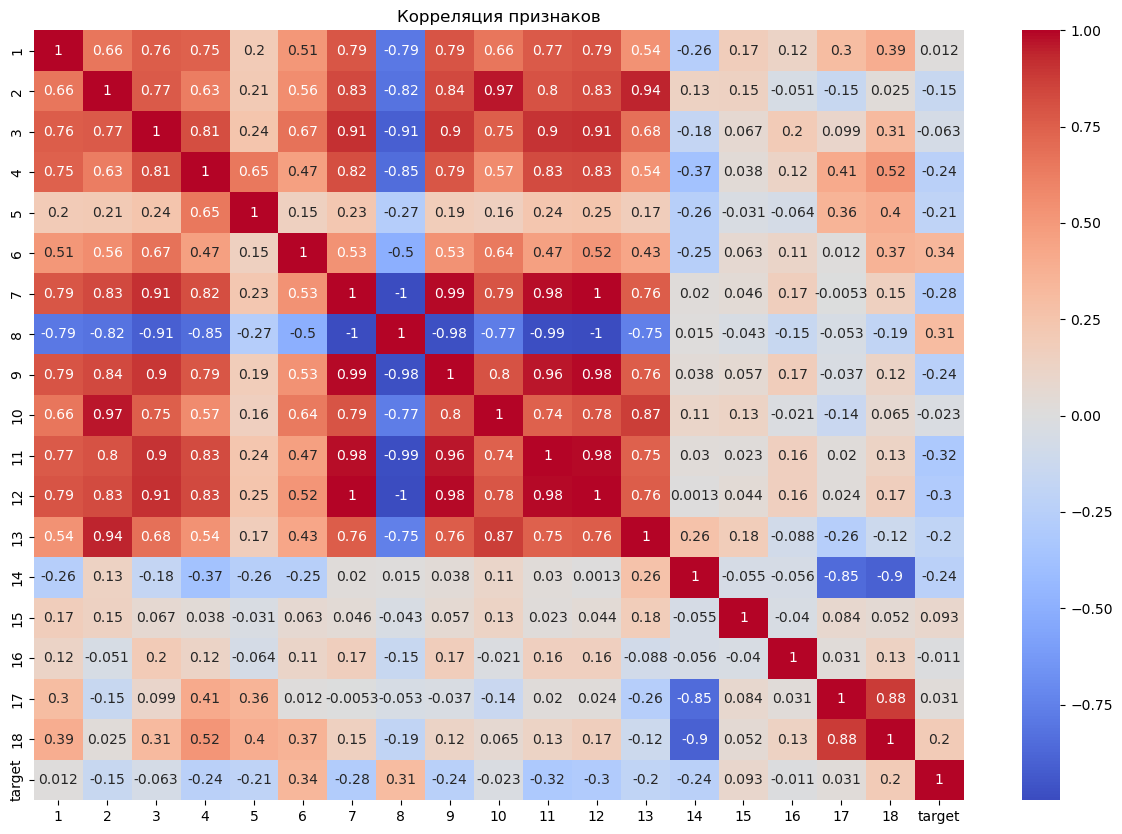

In [112]:
# Создадим комбинированный датафрейм
# heat_df = pd.concat([data_df_log, y_target], axis=1)

fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data_df_log.corr(), annot=True, ax=axes, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

> Корреляция на таргет у признаков не высокая, а вот мультиколлинеарность заметная, что говорит о том, что в простейщем варианте можно было бы дропать фиты, но так как в дальнейших заданиях у нас имеется метод главных компонент, выявим подмножество/ва признаков для этапа PCA.

> За отсечку примем значение по модулю 0.8, но сначала удалим фиты с корреляцией равной 0.95-1 исходя из принципа меньшего влияния на таргет.



In [174]:
data_df_log_cleaned = data_df_log.drop(columns=[9, 7, 12, 8, 10, 14])

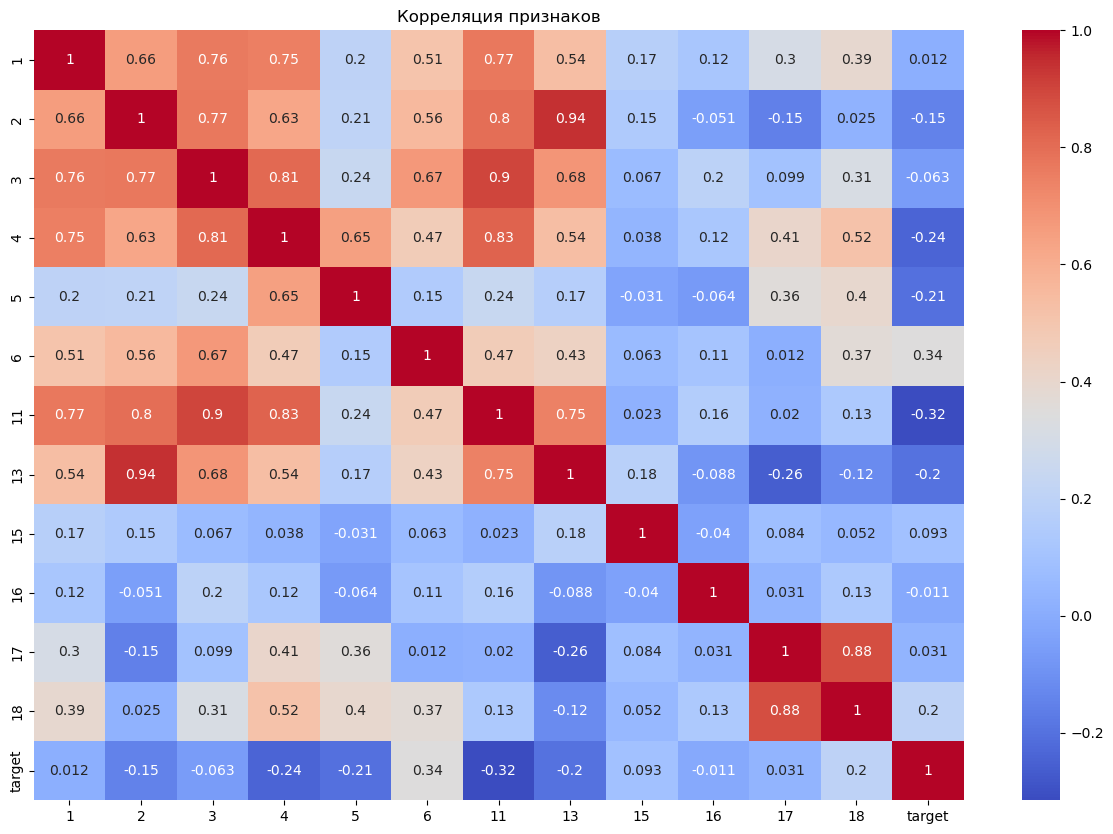

In [175]:
# Проверим результат
fig, axes = plt.subplots(1, 1, figsize=(15, 10))
sns.heatmap(data_df_log_cleaned.corr(), annot=True, ax=axes, cmap='coolwarm')
plt.title("Корреляция признаков")
plt.show()

In [176]:
# Вычисление высококоррелированных пар (по заданному порогу)
threshold = 0.8
high_corr_pairs = []
for i in range(len(data_df_log_cleaned.corr().columns)):
    for j in range(i):
        if abs(data_df_log_cleaned.corr().iloc[i, j]) > threshold:
            high_corr_pairs.append((data_df_log_cleaned.corr().columns[i], data_df_log_cleaned.corr(
            ).columns[j], data_df_log_cleaned.corr().iloc[i, j]))

# Функция для поиска связных компонент (групп)
def find_connected_components(pairs):
    graph = defaultdict(list)
    # Строим граф
    for x, y, _ in pairs:
        graph[x].append(y)
        graph[y].append(x)

    visited = set()
    groups = []

    # Поиск в глубину (DFS) для нахождения связных компонент
    def dfs(node, component):
        if node not in visited:
            visited.add(node)
            component.append(node)
            for neighbor in graph[node]:
                dfs(neighbor, component)

    for node in graph:
        if node not in visited:
            component = []
            dfs(node, component)
            groups.append(component)

    return groups


# Формирование групп
groups = find_connected_components(high_corr_pairs)

# Вывод результатов
print("Сформированные группы:", groups)

Сформированные группы: [[4, 3, 11], [13, 2], [18, 17]]


> Мы сгруппировали фиты по уровню корреляции в группы для последующего применения PCA на каждой группе в отдельности. 

> Группировка производилась через построение графа на основе порогового значения корреляции по модулю

In [177]:
y_target = data_df_log_cleaned['target']
data_df = data_df_log_cleaned.drop(columns=['target'])

In [207]:
# Разобъем на трейн-тест
X_train, X_test, y_train, y_test = train_test_split(
    data_df, y_target, test_size=0.35, random_state=42)

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(496, 12) (496,) (268, 12) (268,)


Стандартизируем X_train, X_test

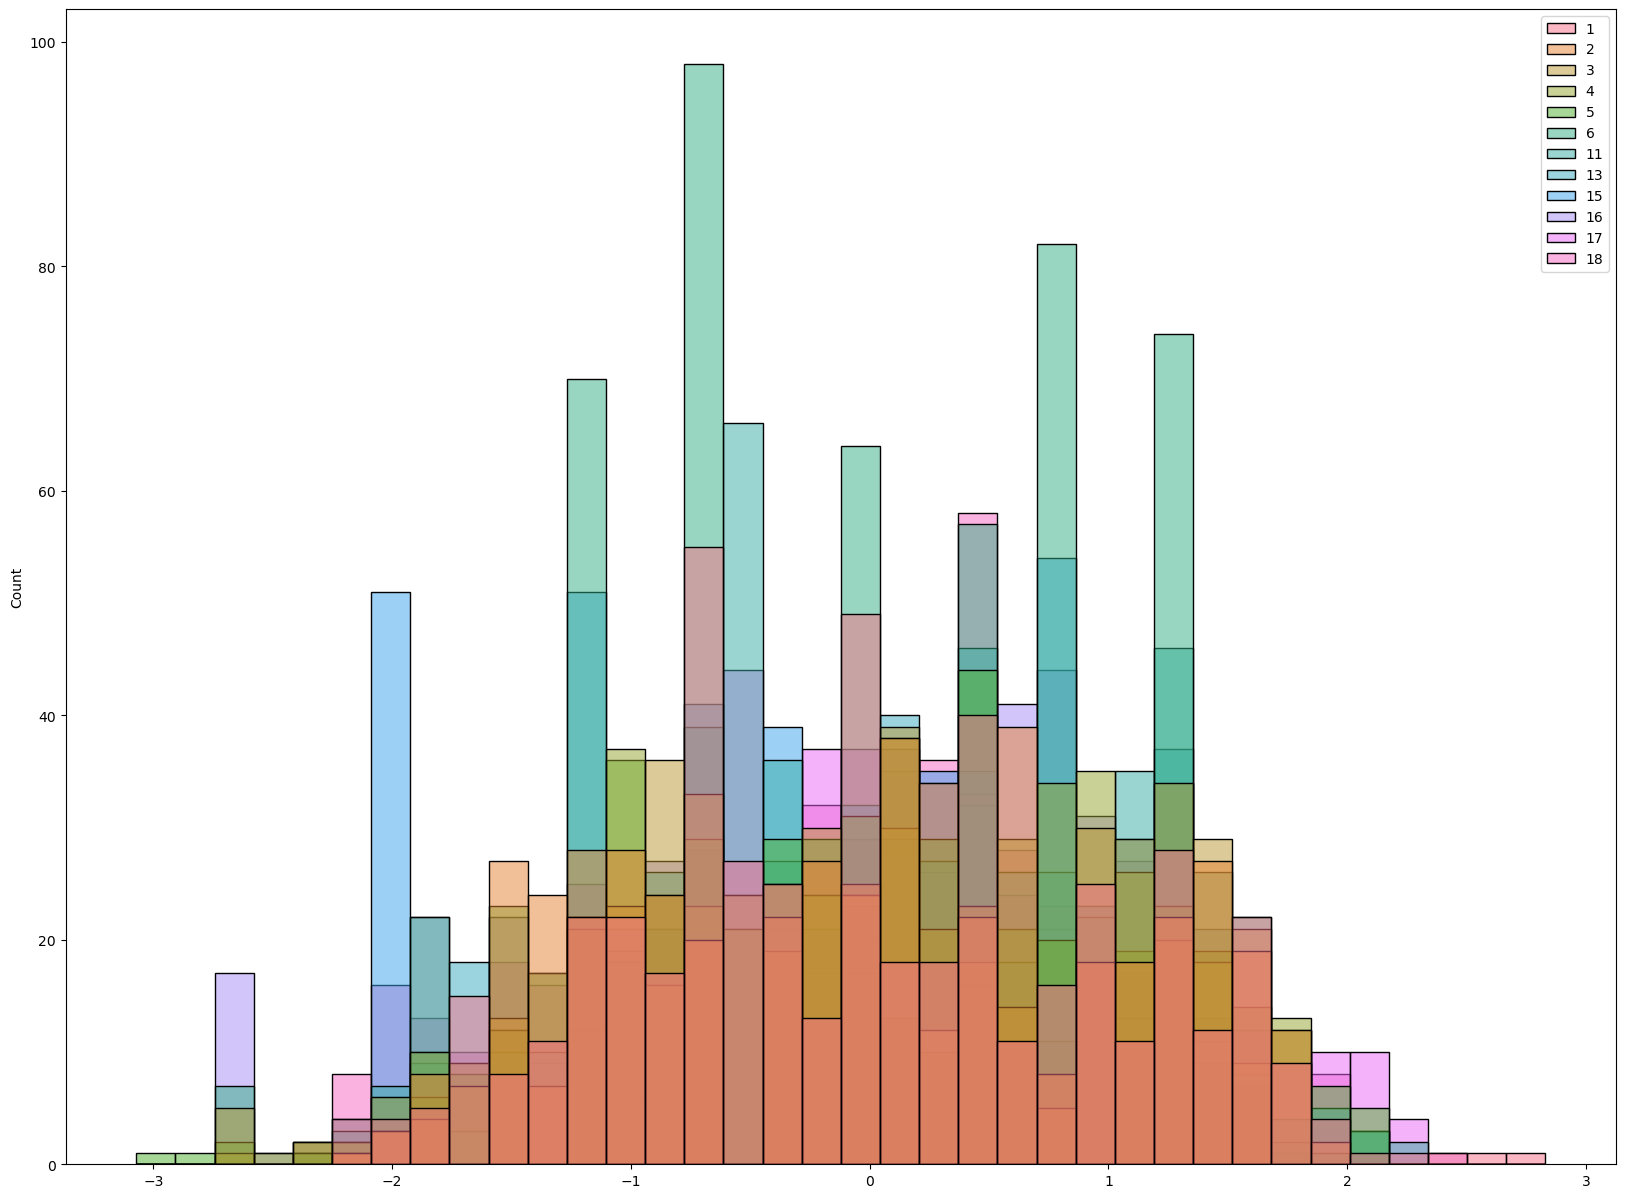

In [208]:
# Инициализируем объект класса скалеров
st_scal = StandardScaler()

# Отскалируем X_train/X_test
X_train_sc = st_scal.fit_transform(X_train)
X_test_sc = st_scal.transform(X_test)

X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

# Посмотрим на распределения на примере трейна
fig, axes = plt.subplots(1, 1, figsize=(20,15))
sns.histplot(data=X_train_sc, ax=axes)
plt.show()

> Можно видеть, что признаки привидены к +/- одному масштабу и схожему распределению.

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

F1 на тесте: 0.7561
Accuracy на тесте: 0.7425
ROC-score на тесте: 0.9273


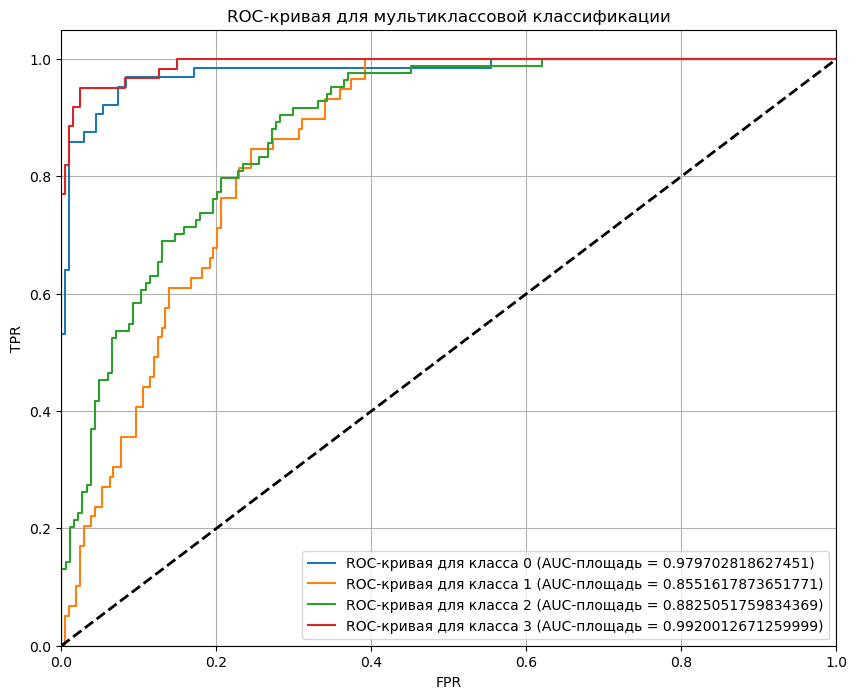

In [209]:
# YOUR CODE HERE
# Создадим функцию для расчета метрик
def metrics_estimation(y_test, y_pred, y_pred_proba):
    # Расчет f1_score, accuracy_score, roc_auc_score на тесте
    f1_test = np.round(f1_score(y_test, y_pred, average='macro'), 4)
    accuracy_test = np.round(accuracy_score(y_test, y_pred), 4)
    rocauc_sc = np.round(roc_auc_score(
        y_test, y_pred_proba, multi_class='ovr'), 4)

    print(f"F1 на тесте: {f1_test}")
    print(f"Accuracy на тесте: {accuracy_test}")
    print(f"ROC-score на тесте: {rocauc_sc}")

    # Построение ROC-AUC кривой для каждого класса
    n_classes = np.unique(y_test).size  # Получаем количество классов
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # Цикл по каждому классу
    for i in range(n_classes):
        # Изменен индекс для бинаризации
        fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Построение ROC кривых
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i],
                 label=f'ROC-кривая для класса {i} (AUC-площадь = {roc_auc[i]})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(
        'ROC-кривая для мультиклассовой классификации')
    plt.legend()
    plt.grid()
    plt.show()


# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
base_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    n_jobs=-1
)

base_log_reg.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = base_log_reg.predict(X_test_sc)
y_pred_proba = base_log_reg.predict_proba(X_test_sc)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Виден дисбаланс в качестве классификации, хотя классы относительно сбалансированы.

/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/dlenv/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was

F1 на тесте: 0.7312
Accuracy на тесте: 0.7164
ROC-score на тесте: 0.9262


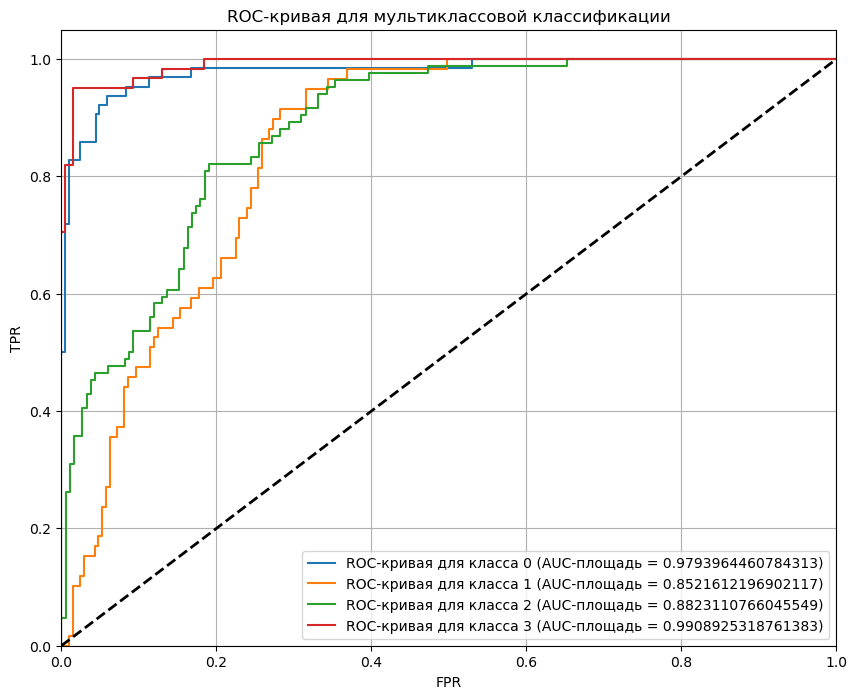

In [210]:
# YOUR CODE HERE
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

class_weights = {0: 0.7, 1: 4, 2: 4, 3: 0.7}
estimator = LogisticRegression(
    class_weight=class_weights,
    solver="saga",
    tol=1e-3,
    max_iter=4000,
    n_jobs=-1,
    random_state=42
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
base_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    n_jobs=-1
)

base_log_reg.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = base_log_reg.predict(X_test_sc)
y_pred_proba = base_log_reg.predict_proba(X_test_sc)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

In [211]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

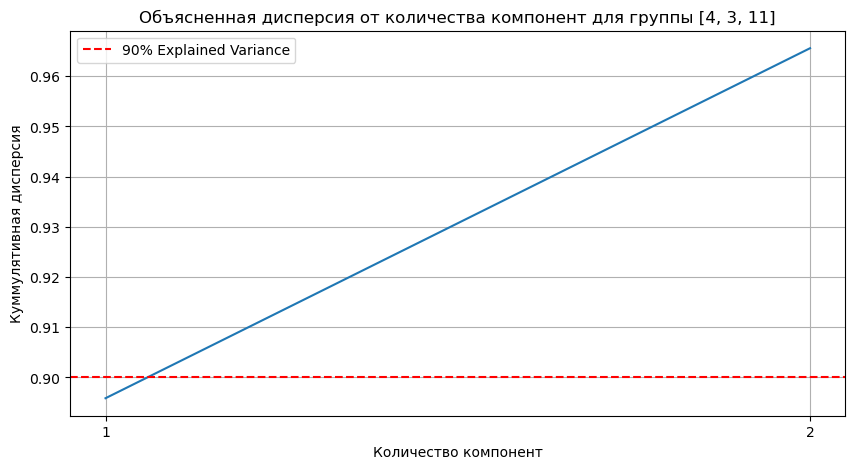

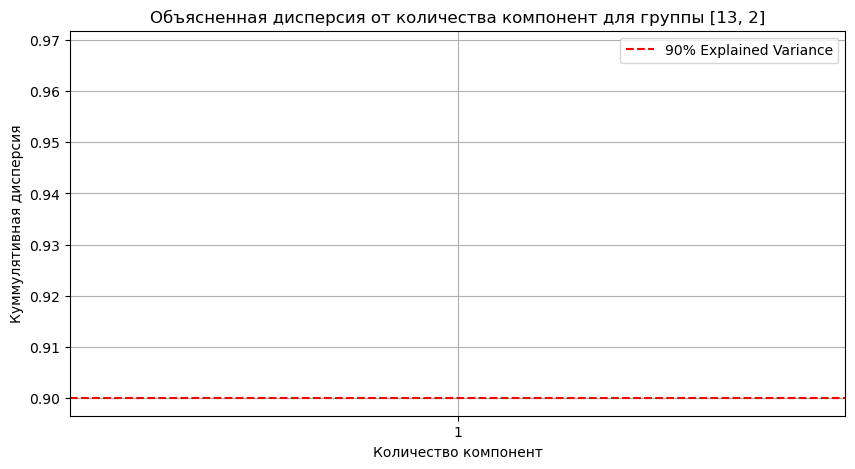

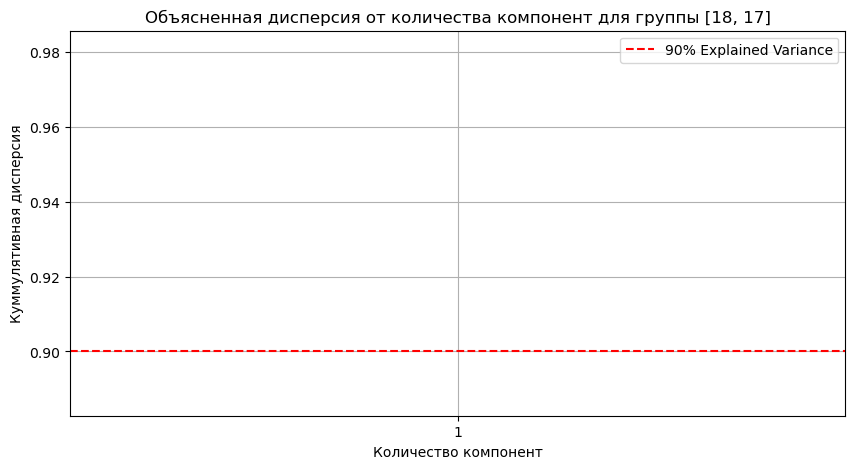

In [212]:
# Сразу подготовим данные для дальнейших манипуляций
# Выделим колонки, которые не пойдут под трансформацию
columns_wo_pca = [i for i in groups for i in i]

# создадим субсеты для трейн/теста которые не будем трогать
X_train_wo_pca = X_train_sc.drop(columns=columns_wo_pca)
X_test_wo_pca = X_test_sc.drop(columns=columns_wo_pca)

# Выделим группы с этапа хитмапа
pca_group_1 = groups[0]
pca_group_2 = groups[1]
pca_group_3 = groups[2]

# На их основе создадим субсеты для PCA
X_train_pca_1 = X_train_sc[pca_group_1]
X_train_pca_2 = X_train_sc[pca_group_2]
X_train_pca_3 = X_train_sc[pca_group_3]

X_test_pca_1 = X_test_sc[pca_group_1]
X_test_pca_2 = X_test_sc[pca_group_2]
X_test_pca_3 = X_test_sc[pca_group_3]

##############################################


def var_visualisation(pca_group, subset):
    var_plot_data = list()

    for i in range(1, len(pca_group)):
        pca = PCA(n_components=i, random_state=42)
        pca.fit(subset)
        # var_plot_data[i] = pca.explained_variance_ratio_
        var_plot_data.append(pca.explained_variance_ratio_)

    # Подготовка данных для графика
    num_components = list(range(1, len(var_plot_data) + 1)
                          )  # Количество компонент
    # Суммарная объясненная дисперсия
    explained_variance = [sum(var) for var in var_plot_data]

    # Построение графика
    fig, axes = plt.subplots(1, 1, figsize=(10, 5))
    sns.lineplot(x=num_components, y=explained_variance, ax=axes)
    plt.title(
        f'Объясненная дисперсия от количества компонент для группы {pca_group}')
    plt.xlabel('Количество компонент')
    plt.ylabel('Куммулятивная дисперсия')
    plt.xticks(num_components)  # Отображение всех значений по оси X
    plt.grid()
    plt.axhline(y=0.9, color='r', linestyle='--',
                label='90% Explained Variance')  # Отметка для 90%
    plt.legend()
    plt.show()

###############################################


var_visualisation(pca_group_1, X_train_pca_1)
var_visualisation(pca_group_2, X_train_pca_2)
var_visualisation(pca_group_3, X_train_pca_3)

In [213]:
print(X_train_pca_1.shape, X_train_pca_2.shape, X_train_wo_pca.shape)
print(X_test_pca_1.shape, X_test_pca_2.shape, X_test_wo_pca.shape)

(496, 3) (496, 2) (496, 5)
(268, 3) (268, 2) (268, 5)


> Для первой группы возьмем количество компонент равное 2, для второй группы равное 1, для третьей 2.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [214]:
### YOUR CODE HERE
# Преобразуем по отдельности группы 
comp_1 = 2
pca_agent_1 = PCA(n_components=comp_1, random_state=42)
X_train_pca_1 = pca_agent_1.fit_transform(X_train_pca_1)
X_train_pca_1 = pd.DataFrame(X_train_pca_1, columns=[pca_group_1[:comp_1]]) # извращение
X_test_pca_1 = pca_agent_1.transform(X_test_pca_1)
X_test_pca_1 = pd.DataFrame(X_test_pca_1, columns=[pca_group_1[:comp_1]])

comp_2 = 1
pca_agent_2 = PCA(n_components=comp_2, random_state=42)
X_train_pca_2 = pca_agent_2.fit_transform(X_train_pca_2)
X_train_pca_2 = pd.DataFrame(X_train_pca_2, columns=[pca_group_2[:comp_2]]) # извращение
X_test_pca_2 = pca_agent_2.transform(X_test_pca_2)
X_test_pca_2 = pd.DataFrame(X_test_pca_2, columns=[pca_group_2[:comp_2]])

comp_3 = 1
pca_agent_3 = PCA(n_components=comp_3, random_state=42)
X_train_pca_3 = pca_agent_3.fit_transform(X_train_pca_3)
X_train_pca_3 = pd.DataFrame(X_train_pca_3, columns=[pca_group_3[:comp_3]]) # извращение
X_test_pca_3 = pca_agent_3.transform(X_test_pca_3)
X_test_pca_3 = pd.DataFrame(X_test_pca_3, columns=[pca_group_3[:comp_3]])


In [215]:
X_train_pca = pd.concat([X_train_wo_pca, X_train_pca_1, X_train_pca_2, X_train_pca_3], axis=1)
X_test_pca = pd.concat([X_test_wo_pca, X_test_pca_1, X_test_pca_2, X_test_pca_3], axis=1)

display(X_train_pca.head(), X_test_pca.head())

,1,5,6,15,16,"(4,)","(3,)","(13,)","(18,)"
0,-0.494644,0.128493,1.202734,1.410452,-0.304432,-0.952090,-0.460725,0.480078,-0.972653
1,1.225257,1.027192,1.561701,0.594482,0.913994,2.731844,0.200746,2.159866,0.775937
2,-0.233355,0.128493,-1.905811,1.195824,-0.636347,-3.053839,0.346893,-1.683765,-0.216679
3,-1.173852,-1.049213,1.202734,0.830711,0.862708,-1.073848,-0.863223,0.088156,-1.235638
4,0.148226,1.198979,0.385080,0.117170,1.523255,2.337405,0.147186,0.777029,0.775937


,1,5,6,15,16,"(4,)","(3,)","(13,)","(18,)"
0,0.396045,-0.251128,-0.087429,-1.992082,-2.703599,-0.156139,0.236954,-1.850195,-0.694690
1,-1.456661,0.675905,-0.615648,-0.097458,0.255725,-1.153018,0.297805,-1.019555,-0.362623
2,0.396045,0.852859,-0.615648,-1.992082,0.565236,-0.836654,0.793071,-2.360087,2.638109
3,1.225257,-1.469516,-2.723466,-1.176112,0.963097,1.244667,-0.647645,1.049219,-0.775894
4,-0.494644,-0.251128,0.812516,-1.176112,-0.636347,-0.403332,-0.555935,0.592286,-0.642285


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

F1 на тесте: 0.6504
Accuracy на тесте: 0.6418
ROC-score на тесте: 0.8876


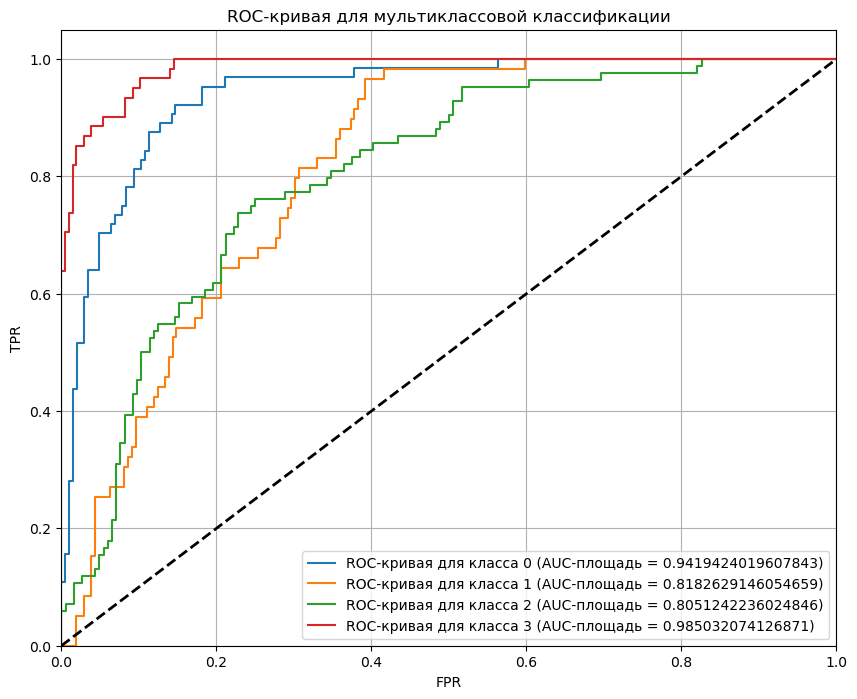

In [216]:
### YOUR CODE HERE
# Скопируем старый код и поменяем на x_pca
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = LogisticRegression(
    # multi_class="multinomial", # уберу для тушения ворнингов
    solver="saga",
    tol=1e-3,
    max_iter=500,
    n_jobs=-1
)

param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1']},
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['elasticnet'], 'l1_ratio': [0, 0.5, 1]},
]

# Пройдемся по сетке со скорингом из двух метрик
pca_log_reg = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

pca_log_reg.fit(X_train_pca, y_train)

# Предсказания на тестовых данных
y_pred = pca_log_reg.predict(X_test_pca)
y_pred_proba = pca_log_reg.predict_proba(X_test_pca)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> Стало хуже, следовательно в дальнейших изысканиях буду использовать скалированное но не сжатое пространство признаков.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

F1 на тесте: 0.6383
Accuracy на тесте: 0.6306
ROC-score на тесте: 0.8078


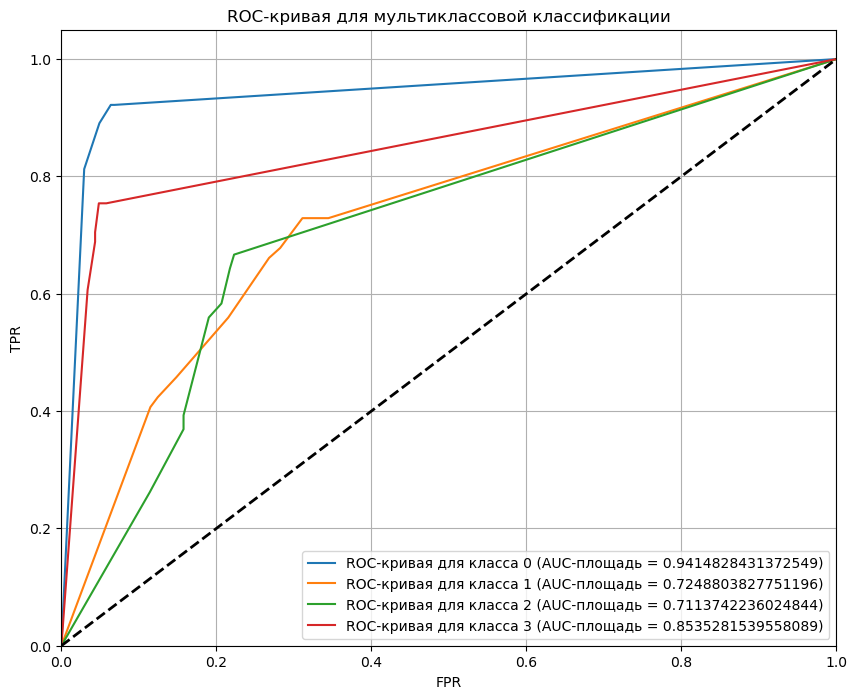

In [217]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
### YOUR CODE HERE
# Скопируем старый код 
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score, sample_weigh='weighted')

estimator = DecisionTreeClassifier(
    random_state=42
)

# Определяем параметры для поиска
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']
}

# Пройдемся по сетке со скорингом из двух метрик
scaled_tree = GridSearchCV(
    estimator=estimator,
    param_grid=param_grid,
    return_train_score=True,
    scoring=f1,
    refit=True,
    n_jobs=-1
)

scaled_tree.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = scaled_tree.predict(X_test_sc)
y_pred_proba = scaled_tree.predict_proba(X_test_sc)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

> И опять, результат еще хуже.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

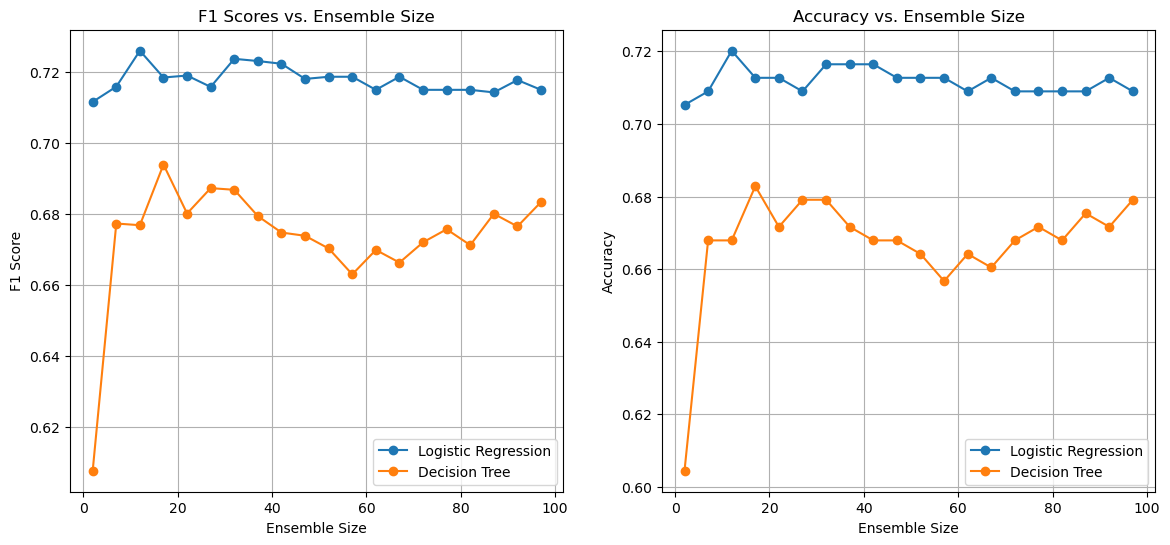

In [218]:
# YOUR CODE HERE
N_min = 2
N_max = 100
step = 5
ensemble_sizes = list(range(N_min, N_max + 1, step))
f1_scores_logreg = []
f1_scores_tree = []
accuracy_scores_logreg = []
accuracy_scores_tree = []

for N in ensemble_sizes:
    # Bagging для логистической регрессии
    logreg_bagging = BaggingClassifier(estimator=LogisticRegression(),
                                       n_estimators=N,
                                       random_state=42)
    logreg_bagging.fit(X_train_sc, y_train)
    y_pred_logreg = logreg_bagging.predict(X_test_sc)
    # Используем f1_score напрямую
    f1_scores_logreg.append(f1_score(y_test, y_pred_logreg, average='macro'))
    # Используем accuracy_score напрямую
    accuracy_scores_logreg.append(accuracy_score(y_test, y_pred_logreg))

    # Bagging для деревьев решений
    tree_bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                                     n_estimators=N,
                                     random_state=42)
    tree_bagging.fit(X_train_sc, y_train)
    y_pred_tree = tree_bagging.predict(X_test_sc)
    # Используем f1_score напрямую
    f1_scores_tree.append(f1_score(y_test, y_pred_tree, average='macro'))
    # Используем accuracy_score напрямую
    accuracy_scores_tree.append(accuracy_score(y_test, y_pred_tree))

# Построение графиков остается без изменений
plt.figure(figsize=(14, 6))

# График F1-меры
plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, f1_scores_logreg,
         label='Logistic Regression', marker='o')
plt.plot(ensemble_sizes, f1_scores_tree, label='Decision Tree', marker='o')
plt.title('F1 Scores vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()

# График точности
plt.subplot(1, 2, 2)
plt.plot(ensemble_sizes, accuracy_scores_logreg,
         label='Logistic Regression', marker='o')
plt.plot(ensemble_sizes, accuracy_scores_tree,
         label='Decision Tree', marker='o')
plt.title('Accuracy vs. Ensemble Size')
plt.xlabel('Ensemble Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

F1 на тесте: 0.688
Accuracy на тесте: 0.6702
ROC-score на тесте: 0.9144


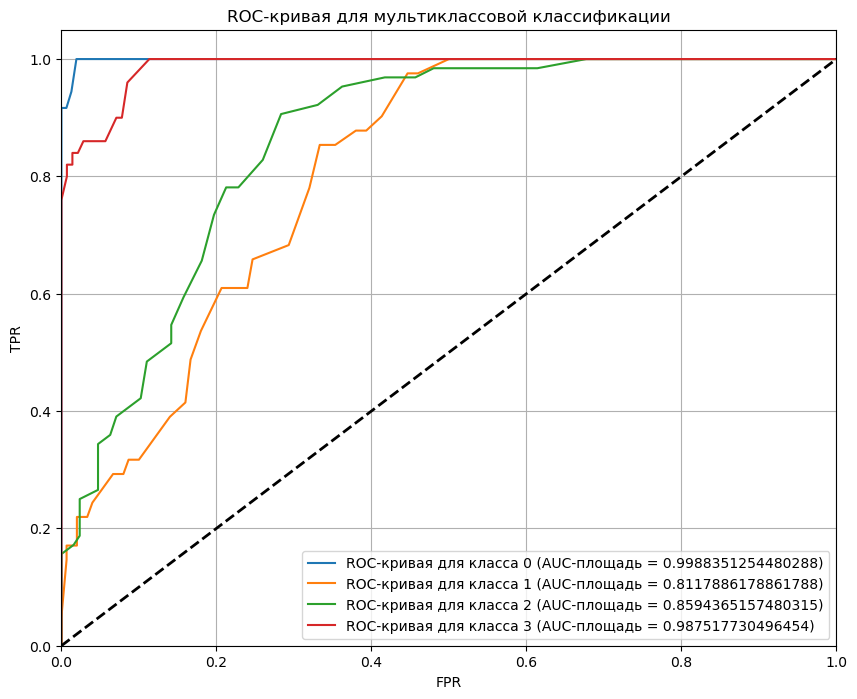

In [151]:
### YOUR CODE HERE
# Скопируем старый код 
# Используем скорер-мейкеры для использования в
# грид-серче, используем взвешенный расчет
f1 = make_scorer(f1_score, average='macro')
accuracy = make_scorer(accuracy_score)

estimator = RandomForestClassifier(
    random_state=42
)

# Определяем параметры для поиска
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Создание скореров для нескольких метрик
scoring = {
    'f1': f1,
    'accuracy': accuracy
}

# Настройка RandomizedSearchCV
scaled_forest = RandomizedSearchCV(
    estimator=estimator,
    param_distributions=param_grid,
    return_train_score=True,
    scoring=scoring,
    refit='f1',
    n_jobs=-1,
)

scaled_forest.fit(X_train_sc, y_train)

# Предсказания на тестовых данных
y_pred = scaled_forest.predict(X_test_sc)
y_pred_proba = scaled_forest.predict_proba(X_test_sc)

# Расчитаем метрики на пожобранных параметрах
metrics_estimation(y_test, y_pred, y_pred_proba)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [147]:
# YOUR CODE HERE
# Разделяем X_train и y_train на 10 частей
X_train_split = np.array_split(X_train_sc, 10)
y_train_split = np.array_split(y_train, 10)

# Инициализируем модели с оптимальными гиперпараметрами
logreg = base_log_reg 
decision_tree = scaled_tree
random_forest = scaled_forest